In [574]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import fmin_cg
import scipy.io

In [575]:
data = scipy.io.loadmat("ex5data1.mat")

In [576]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [577]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [578]:
print(X[:,0], "\n", len(X))
print(y[:,0], "\n", len(y))

[-15.93675813 -29.15297922  36.18954863  37.49218733 -48.05882945
  -8.94145794  15.30779289 -34.70626581   1.38915437 -44.38375985
   7.01350208  22.76274892] 
 12
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507  2.12107248
 14.71026831  2.61418439  3.74017167  3.73169131  7.62765885 22.7524283 ] 
 12


In [579]:
theta = np.ones(2).reshape(2,1)
X_ = np.column_stack((np.ones(X.shape[0]), X))
Xtest = np.column_stack((np.ones(Xtest.shape[0]), Xtest))
Xval = np.column_stack((np.ones(Xval.shape[0]), Xval))

In [610]:
#def sigmoid(z):
#    return 1 / (1 + np.exp(-z))

def hypothesis(theta, X):
    #print(theta.shape, X.shape)
    return X.dot(theta)
    
def linearRegCostFunction(theta, X, y, l=0.):
    #X = np.column_stack((np.ones(X.shape[0]), X))
    #theta = theta.reshape(2,1)
    theta = theta.reshape(X.shape[1],1)
    h = hypothesis(theta, X)
    
    #debubbing]    
    m = len(y)
    diff = h-y
    
    left = diff.T.dot(diff)*(1/(2*m))
    right = np.sum(theta[1:] * theta[1:]) * (l/(2*m))
    return left + right

    
print(linearRegCostFunction(theta, X_, y, 1.0))

[[303.99319222]]


In [611]:
def linearRegGradient(theta, X, y, l=1.0):
    #print(X.shape[1])
    theta = theta.reshape(X.shape[1],1)
    h = hypothesis(theta,X)
    
    m = len(y)
    term = (1/m) * X.T.dot(h-y)
    reg_term = l/m * theta
    reg_term[0] = 0.0
    
    return (term + reg_term).flatten()
linearRegGradient(theta, X_, y, 1.0)

array([-15.30301567, 598.25074417])

In [677]:
def optimizeTheta(theta, X, y, l=1.0):
    #print("training set: ", len(X))
    print(l)
    result = fmin_cg(f = linearRegCostFunction,
                     x0 = theta,
                     fprime = linearRegGradient,
                     args = (X, y, l),
                     disp = True,
                     maxiter = 1000)
    return result
optimized_theta = optimizeTheta(theta, X_, y, 1.0)
                     

1.0
Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


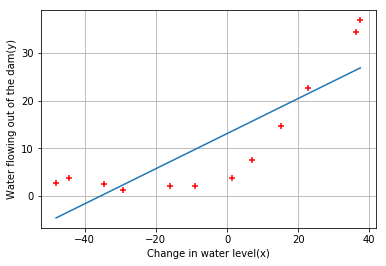

In [678]:
def plotData(X,y):
    plt.figure()
    plt.xlabel("Change in water level(x)")
    plt.ylabel("Water flowing out of the dam(y)")
    plt.grid(True)
    plt.scatter(X[:,0], y[:,0], marker ='+', color='r')
    
    w0 = optimized_theta[0]
    w1 = optimized_theta[1]
    
    x = np.array([np.min(X), np.max(X)])
    y = w0 + x*w1
    
    plt.plot(x, y, label="boundary")
    plt.show()
plotData(X,y)

1.0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
1.0
Optimization terminated successfully.
         Current function value: 0.001307
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
1.0
Optimization terminated successfully.
         Current function value: 3.335017
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
1.0
Optimization terminated successfully.
         Current function value: 2.881847
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
1.0
Optimization terminated successfully.
         Current function value: 13.174273
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
1.0
Optimization terminated successfully.
         Current function value: 19.461396
         Iterations: 4
         Function evalu

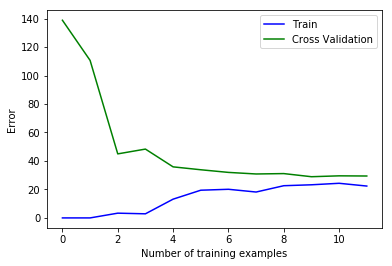

In [679]:
def learningCurve():
    m = len(y)
    
    error_train = []
    error_val = []
    exmaples = np.arange(m)
    for i in exmaples:
        theta = np.ones(2).reshape(2,1) 
        optimized = optimizeTheta(theta, X_[:i+1], y[:i+1], 1.0)
        #print("with #" + str(i+1), optimized)
        error_train.append(linearRegCostFunction(optimized, X_[:i+1], y[:i+1], 1.0)[0][0])
        error_val.append(linearRegCostFunction(optimized, Xval, yval, 1.0)[0][0])
        #print("with #" + str(i+1), error_train, error_val)
    
    plt.plot(figsize=(15,20))
    plt.ylabel("Error")
    plt.xlabel("Number of training examples")
    plt.plot(exmaples, error_train, color="b", label = "Train")
    plt.plot(exmaples, error_val, color="g", label = "Cross Validation")
    plt.legend()
    plt.show()


learningCurve()

In [687]:
def polyFeatures(X, degree):
    new_X = X.copy()
    for d in range(2, degree):
        new_X = np.column_stack((new_X, np.power(X[:,1], d)))
    return new_X

poly_X = polyFeatures(X_, 8)

def featureNormalize(feature):
    mean = np.mean(feature, axis=0)
    std = np.std(feature, axis=0)
    
    feature[:,1:] -= mean[1:]
    feature[:,1:] /= std[1:]
    
    return mean, std

mean, std = featureNormalize(poly_X)

In [698]:
def learnPolynomial(poly_X, y, l):
    feature_size = poly_X.shape[1]
    theta = np.ones(feature_size).reshape(feature_size,1)
    optimized = optimizeTheta(theta, poly_X, y, l)
    return optimized
    
poly_optimized = learnPolynomial(poly_X, y, 1)
print(poly_optimized)

    

1
Optimization terminated successfully.
         Current function value: 6.836763
         Iterations: 41
         Function evaluations: 65
         Gradient evaluations: 65
[11.21759898  8.39868643  5.10949068  3.39414511  2.2333891   1.56959698
  1.08988997  0.92772402]


(8,)
(50, 8)


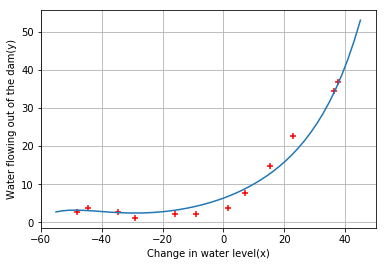

In [699]:
def plotPolyFit(X, y, poly_optimized, mean, std):
    plt.figure()
    plt.xlabel("Change in water level(x)")
    plt.ylabel("Water flowing out of the dam(y)")
    plt.scatter(X[:,0], y[:,0], marker ='+', color='r')
    plt.grid(True)
    
    #x = np.linspace(np.min(X), np.max(X), 50)
    x = np.linspace(-55, 45, 50)
    x_data = np.column_stack((np.ones((x.shape[0],1)), x))
    x_data = polyFeatures(x_data, 8)
    x_data[:,1:] -= mean[1:]
    x_data[:,1:] /= std[1:]
    print(poly_optimized.shape)
    print(x_data.shape)
    y = hypothesis(poly_optimized.T, x_data)
    plt.plot(x, y)
    
    plt.show()
plotPolyFit(X, y, poly_optimized, mean, std)